## Daily Portfolio Value:
    Start_val = $1,000,000.00
    Start_date = 2009-01-01
    End_date = 2011-12-31
    Symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
    Allocs = [0.4, 0.4, 0.1, 0.1]
    
How do we calculate the total value of the portfolio day-by-day?


### Step 1. Normalize prices = Prices / prices[0]
### Step 2. Allocations = Normalize prices * Allocations
### Step 3. Position_values = Allocations * Start_values
### Step 4. Portfolio_values  = Position_values.sum(axis=1)


## Portfolio Statistics:

Step 1: daily_returns = daily_returns[1:]

    -Cumulative_return = (portfolio_value[-1]/portfolio_value[0]) - 1
    -Avgerage_daily_return = daily_returns_.mean()
    -Standard_dev_daily_return = daily_return.std()
    -Sharpe_ratio = "Risk adjusted return"  
                    Allows quantitative assessment 
                        -lower risk is better
                        -higher return is better
                    SR also considers:
                        -risk free rate of return

## Portfolio Value:
    Directly proportional to returns generated over a baseline, and inversely proportional to its volatility.

 ## What is an example Sharp Ratio (SR) formula?
        Rp: portfolio return
        Rf: risk free rate of return
        Op: std dev of portfolio return
 
     Sharp_Ratio = (Rp - Rf) / Op

## Computing Sharpe Ratio:
    S = E[Rp - Rf] / std[Rp - Rf]
    
    To compute in python:
        S = mean(daily_ret - daily_rf) / std(daily_ret - daily_rf)
        
        *What is the Rf (risk free rate_?
            Sources:
                LIBOR, 3mo T-Bill, 0%
                
       Traditional Shortcut:
           daily_rf = 252thSQ(1.0 + 0.1) - 1
           
     To compute in python:
        S = mean(daily_ret - daily_rf) / std(daily_ret)
        
       

## Sharp Ratio - computed on how frequently you sample:

    SR is an annual measure
    SRannualized = k * SR
    k = sq(#samples per year)
        daily k = sq(252)
        weekly k = sq(52)
        monthly k = sq(12)
        
    SR = sq(252) * mean(daily_returns - daily_rf) / std(daily_returns)

## What is the sharpe ratio?

    Given:
        60 days of data
        avg daily retrun = 10 bps = 0.001
        daily risk free = 2 bps = 0.0002
        std daily return = 10 bps = 0.001
        

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
k = np.sqrt(252)  # because we're sampling daily data
avg_daily_rets = 0.001 
daily_rf = 0.0002
std_daily_rets = 0.001

SR = k * np.mean(avg_daily_rets - daily_rf) / std_daily_rets

In [5]:
print(SR)

12.6996062931


## To create:
Functions to automatically calculate:
    1. Cumulative_return 
    2. Avgerage_daily_return
    3. Risk (standard_dev_daily_return)
    4. Sharpe_ratio 
    
    
    start_val = 1000000
    dates = pd.date_range('2009-01-01', '2011-12-31')
    symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
    allocs = [0.4, 0.4, 0.1, 0.1]

### 1. Normalize prices:

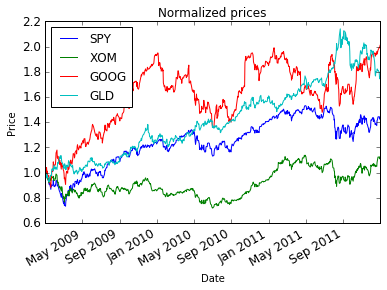

In [6]:
"""Normalize Prices and Plot"""

import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range"""
    plot_data(df.ix[start_index:end_index,columns], title="Selected data")
     

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols: # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                           parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp) # use default how='left'
        if symbol == 'SPY': #drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
        
    return df

def normalize_data(df):
    """Normalize stock prices using the first row of the df"""
    return df / df.ix[0,:]
    
    
def plot_data(df, title="Normalized prices"):
    """Plot stock prices"""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show() # called to show plots
   
def test_run():
    # define a date range
    dates = pd.date_range('2009-01-01', '2011-12-31') # 2009 - 2011
    
    # choose stock symbols to read
    symbols = ['XOM', 'GOOG', 'GLD'] # SPY will be added in get_data()
    
    #get stock data
    df = get_data(symbols, dates)
     
    #Slice and plot
    #plot_selected(df, symbols, dates)
    plot_data(normalize_data(df))
    
if __name__ == '__main__':
    test_run()

## 2. Allocated:       

In [ ]:
"""allocated = normalized * allocations  and Plot"""

import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range"""
    plot_data(df.ix[start_index:end_index,columns], title="Selected data")
     

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols: # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                           parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp) # use default how='left'
        if symbol == 'SPY': #drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
        
    return df

def normalize_data(df):
    """Normalize stock prices using the first row of the df"""
    return df / df.ix[0,:]
    
def allocations(df):
    """Allocations per allocated percents"""
    
    
def plot_data(df, title="Normalized prices"):
    """Plot stock prices"""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show() # called to show plots
   
def test_run():
    # define a date range
    dates = pd.date_range('2009-01-01', '2011-12-31') # 2009 - 2011
    
    # choose stock symbols to read
    symbols = ['XOM', 'GOOG', 'GLD'] # SPY will be added in get_data()
    
    #get stock data
    df = get_data(symbols, dates)
     
    #Slice and plot
    #plot_selected(df, symbols, dates)
    plot_data(normalize_data(df))
    
if __name__ == '__main__':
    test_run()

In [ ]:
"""Cumulative_return"""
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

 
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


#------------------reads csv-----------------------------------
def get_data(symbollist, dates):
    df_final=pd.DataFrame(index=dates)
    if "SPY" not in symbollist:
        symbollist.insert(0,"SPY")
    for symbol in symbollist:
        file_path=symbol_to_path(symbol)
        df_temp=pd.read_csv(file_path,parse_dates=True,
                            index_col="Date",
                            usecols=["Date", "Adj Close"])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df_final=df_final.join(df_temp)
        if symbol == "SPY":
            df_final=df_final.dropna(subset=['SPY'])
    return df_final


#------------------plot function------------------------------
def plot_data(df_data):
    ax=df_data.plot(fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
    
    
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[:-1].values) -1
    daily_returns.ix[0, :] = 0 # set daily returns for row 0 to 0
    return daily_returns

def test_run():
    # read data
    start_val = 1000000
    dates = pd.date_range('2009-01-01', '2011-12-31')
    symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
    allocs = [0.4, 0.4, 0.1, 0.1]
    df = get_data(symbols, dates)
     
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    
    
    
    #--------------Scatterplot SPY vs XOM--------------------
    daily_returns.plot(kind='scatter', x='SPY',y='XOM')
    beta_XOM,alpha_XOM = np.polyfit(daily_returns['SPY'],
                                    daily_returns['XOM'],
                                   1)
    print "beta_XOM= ",beta_XOM
    print "alpha_XOM= ",alpha_XOM
    # fitting a line with, "y=mx+b"
    plt.plot(daily_returns['SPY'], 
             beta_XOM*daily_returns['SPY'] + alpha_XOM, 
             '-',
            color='r')
    plt.show()
    
    
    #-------------Scatterplot SPY vs GLD------------------
    daily_returns.plot(kind='scatter', x='SPY',y='GLD')
    beta_GLD,alpha_GLD = np.polyfit(daily_returns['SPY'],
                                    daily_returns['GLD'],
                                   1)
    print "beta_GLD= ",beta_GLD
    print "alpha_GLD= ",alpha_GLD
    # fitting a line with, "y=mx+b"
    plt.plot(daily_returns['SPY'], 
             beta_GLD*daily_returns['SPY'] + alpha_GLD, 
             '-',
            color='r')
    plt.show()
    
    #-----------Calculate correlation coefficient----------------
    # method used = 'pearson'
    print daily_returns.corr(method='pearson')
    
    
    
    #plot_data(daily_returns, title="Daily returns", 
    #         ylabel="Daily returns")
    
    
    
    
if __name__ == "__main__":
    test_run()
